In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../conf/'))
sys.path.append(os.path.join(current_dir, '../crawl/'))
sys.path.append(os.path.join(current_dir, '../data_preparing/'))


# my module
import loader
import boatrace_crawler_conf


def crawle_race_list(soup):
    """
    soupから選手名をリストとして取得
    :return racer_list: 出場選手名を枠順に並べたリスト
    """

    racer_list = []
    table = soup.find(class_="contentsFrame1_inner").find_all(class_="table1")[1]
    rows = table.find_all("tbody", {"class": "is-fs12"})

    for row in rows:
        # 選手名を取得。最後の[1:-1]は改行を削除するため
        racer_name = row.find(class_="is-fs18 is-fBold").text[1:-1]
        # race_result_listの要素としてクロールした結果のリストを追加
        racer_list.append(racer_name)

        # racerの書式をダウンロードファイルに合わせる
        racer_list_mod = []
        for racer_ in racer_list:
            racer_ = racer_.split("\u3000")
            if len(racer_[0]) == 1:
                racer_[0] = racer_[0] + "\u3000\u3000"
            elif len(racer_[0]) == 2:
                racer_[0] = racer_[0][0] + "\u3000" + racer_[0][1]

            if len(racer_[-1]) == 1:
                racer_[-1] == "\u3000\u3000" + racer_[-1]
                racer = racer_[0] + "\u3000\u3000\u3000\u3000" + racer_[-1]

            elif len(racer_[-1]) == 2:
                racer_[-1] = racer_[-1][0] + "\u3000" + racer_[-1][1]
                racer = racer_[0] + "\u3000\u3000" + racer_[-1]

            racer_list_mod.append(racer)

    print(racer_list_mod)

    return racer_list_mod


In [8]:
# 過去のレース結果をdfとして取得
the_race_result_df = loader.load_race_results()
print(the_race_result_df.columns)

2019-03-01 00:00:00 大　村 1 曇 西　 1 1 抜き　
2019-03-01 00:00:00 大　村 2 曇 西　 1 1 逃げ　
2019-03-01 00:00:00 大　村 3 曇 北西 1 1 逃げ　
2019-03-01 00:00:00 大　村 4 晴 北　 1 1 逃げ　
2019-03-01 00:00:00 大　村 5 晴 北　 1 1 逃げ　
2019-03-01 00:00:00 大　村 6 晴 北　 2 1 逃げ　
2019-03-01 00:00:00 大　村 7 晴 北　 1 1 逃げ　
2019-03-01 00:00:00 大　村 8 晴 北西 1 1 まくり
2019-03-01 00:00:00 大　村 9 晴 北西 1 1 逃げ　
2019-03-01 00:00:00 大　村 10 晴 南　 1 1 逃げ　
2019-03-01 00:00:00 大　村 11 晴 無風 0 0 逃げ　
2019-03-01 00:00:00 大　村 12 晴 北　 1 1 逃げ　
2019-03-01 00:00:00 唐　津 1 晴 南西 3 3 逃げ　
2019-03-01 00:00:00 唐　津 2 晴 南西 3 3 まくり
2019-03-01 00:00:00 唐　津 3 晴 南西 3 3 差し　
2019-03-01 00:00:00 唐　津 4 晴 南西 3 3 逃げ　
2019-03-01 00:00:00 唐　津 6 晴 南西 3 3 逃げ　
2019-03-01 00:00:00 唐　津 7 晴 南西 1 1 まくり
2019-03-01 00:00:00 唐　津 8 晴 北西 2 2 逃げ　
2019-03-01 00:00:00 唐　津 9 晴 北　 2 2 逃げ　
2019-03-01 00:00:00 唐　津 10 晴 北東 4 4 まくり
2019-03-01 00:00:00 唐　津 11 晴 北東 3 3 差し　
2019-03-01 00:00:00 唐　津 12 晴 北東 3 3 逃げ　
2019-03-01 00:00:00 福　岡 1 晴 南　 1 2 逃げ　
2019-03-01 00:00:00 福　岡 2 晴 南　 1 2 まくり
2019-03-01 00:00:00

2019-03-02 00:00:00 多摩川 3 晴 北　 3 2 逃げ　
2019-03-02 00:00:00 多摩川 4 晴 北　 3 2 逃げ　
2019-03-02 00:00:00 多摩川 5 晴 北東 3 2 差し　
2019-03-02 00:00:00 多摩川 6 晴 北東 3 2 逃げ　
2019-03-02 00:00:00 多摩川 7 晴 北東 2 2 差し　
2019-03-02 00:00:00 多摩川 8 晴 北東 2 2 まくり
2019-03-02 00:00:00 多摩川 9 晴 北東 1 2 逃げ　
2019-03-02 00:00:00 多摩川 10 晴 北東 1 2 まくり
2019-03-02 00:00:00 多摩川 11 曇 北東 2 2 逃げ　
2019-03-02 00:00:00 多摩川 12 晴 北　 1 2 逃げ　
2019-03-02 00:00:00 平和島 1 晴 北　 4 5 逃げ　
2019-03-02 00:00:00 平和島 2 晴 北　 6 5 まくり
2019-03-02 00:00:00 平和島 3 晴 北　 6 5 差し　
2019-03-02 00:00:00 平和島 4 晴 北　 1 0 抜き　
2019-03-02 00:00:00 平和島 5 晴 北西 5 5 逃げ　
2019-03-02 00:00:00 平和島 6 晴 北　 4 5 差し　
2019-03-02 00:00:00 平和島 7 晴 北西 4 5 逃げ　
2019-03-02 00:00:00 平和島 8 晴 北西 4 5 逃げ　
2019-03-02 00:00:00 平和島 9 晴 北西 3 3 まくり
2019-03-02 00:00:00 平和島 10 晴 西　 2 3 逃げ　
2019-03-02 00:00:00 平和島 11 晴 南西 2 3 逃げ　
2019-03-02 00:00:00 平和島 12 晴 南西 2 3 逃げ　
2019-03-02 00:00:00 江戸川 1 晴 北　 5 0 逃げ　
2019-03-02 00:00:00 江戸川 2 晴 北　 5 0 抜き　
2019-03-02 00:00:00 江戸川 3 晴 北　 4 0 まくり
2019-03-02 00:00:00

2019-03-04 00:00:00 浜名湖 5 晴 北　 2 1 逃げ　
2019-03-04 00:00:00 浜名湖 6 曇 西　 2 1 差し　
2019-03-04 00:00:00 浜名湖 7 曇 南西 3 1 差し　
2019-03-04 00:00:00 浜名湖 8 雨 西　 3 1 差し　
2019-03-04 00:00:00 浜名湖 9 雨 北西 3 1 逃げ　
2019-03-04 00:00:00 浜名湖 10 雨 西　 3 1 逃げ　
2019-03-04 00:00:00 浜名湖 11 曇 西　 2 1 差し　
2019-03-04 00:00:00 浜名湖 12 曇 北西 3 1 まくり
2019-03-04 00:00:00 多摩川 1 雨 北西 2 2 逃げ　
2019-03-04 00:00:00 多摩川 2 雨 北西 2 2 逃げ　
2019-03-04 00:00:00 多摩川 3 雨 北西 2 2 まくり
2019-03-04 00:00:00 多摩川 4 雨 北西 2 2 逃げ　
2019-03-04 00:00:00 多摩川 5 雨 北西 2 2 差し　
2019-03-04 00:00:00 多摩川 6 雨 北西 2 2 まくり
2019-03-04 00:00:00 多摩川 7 雨 北西 2 2 逃げ　
2019-03-04 00:00:00 多摩川 8 雨 北西 2 2 差し　
2019-03-04 00:00:00 多摩川 9 曇 北西 3 2 逃げ　
2019-03-04 00:00:00 多摩川 10 雨 北　 1 2 逃げ　
2019-03-04 00:00:00 多摩川 11 雨 北西 2 2 まくり
2019-03-04 00:00:00 多摩川 12 雨 北　 1 2 抜き　
2019-03-04 00:00:00 平和島 1 雨 北　 5 5 逃げ　
2019-03-04 00:00:00 平和島 2 雨 北　 5 5 逃げ　
2019-03-04 00:00:00 平和島 3 雨 北　 3 3 抜き　
2019-03-04 00:00:00 平和島 4 雨 北　 5 5 まくり
2019-03-04 00:00:00 平和島 5 雨 北　 7 5 抜き　
2019-03-04 00:00:00

2019-03-07 00:00:00 琵琶湖 3 曇 北西 3 2 差し　
2019-03-07 00:00:00 琵琶湖 4 曇 北東 3 2 差し　
2019-03-07 00:00:00 琵琶湖 5 曇 北西 3 3 差し　
2019-03-07 00:00:00 琵琶湖 6 曇 北西 2 3 まくり
2019-03-07 00:00:00 琵琶湖 7 雨 北西 5 3 まくり
2019-03-07 00:00:00 琵琶湖 8 曇 北　 1 2 差し　
2019-03-07 00:00:00 琵琶湖 9 曇 北西 2 4 逃げ　
2019-03-07 00:00:00 琵琶湖 10 雨 北西 2 3 差し　
2019-03-07 00:00:00 琵琶湖 11 曇 北　 2 3 逃げ　
2019-03-07 00:00:00 琵琶湖 12 曇 無風 0 2 逃げ　
2019-03-07 00:00:00 　津　 1 晴 北西 8 6 逃げ　
2019-03-07 00:00:00 　津　 2 晴 北西 8 6 逃げ　
2019-03-07 00:00:00 　津　 3 晴 北西 8 6 まくり
2019-03-07 00:00:00 　津　 4 晴 北西 7 5 差し　
2019-03-07 00:00:00 　津　 5 曇 北西 7 5 逃げ　
2019-03-07 00:00:00 　津　 6 晴 北西 7 5 差し　
2019-03-07 00:00:00 　津　 7 晴 北西 7 5 まくり
2019-03-07 00:00:00 　津　 8 晴 北西 7 5 差し　
2019-03-07 00:00:00 　津　 9 晴 北西 6 5 逃げ　
2019-03-07 00:00:00 　津　 10 曇 北西 6 5 逃げ　
2019-03-07 00:00:00 　津　 11 曇 北西 6 5 逃げ　
2019-03-07 00:00:00 　津　 12 曇 北西 6 5 逃げ　
2019-03-07 00:00:00 戸　田 1 曇 北　 3 1 まくり
2019-03-07 00:00:00 戸　田 2 雨 北　 3 1 まくり
2019-03-07 00:00:00 戸　田 3 雨 北　 3 1 差し　
2019-03-07 00:00:00

2019-03-10 00:00:00 若　松 11 雨 南　 1 1 まくり
2019-03-10 00:00:00 若　松 12 雨 南　 1 1 差し　
2019-03-10 00:00:00 下　関 1 雨 南　 3 3 逃げ　
2019-03-10 00:00:00 下　関 2 雨 南　 2 2 まくり
2019-03-10 00:00:00 下　関 3 雨 南　 2 2 逃げ　
2019-03-10 00:00:00 下　関 4 雨 南　 1 1 まくり
2019-03-10 00:00:00 下　関 5 雨 南　 1 1 逃げ　
2019-03-10 00:00:00 下　関 6 雨 南　 2 2 逃げ　
2019-03-10 00:00:00 下　関 7 雨 南　 1 1 逃げ　
2019-03-10 00:00:00 下　関 8 雨 南　 3 3 まくり
2019-03-10 00:00:00 下　関 9 雨 南　 2 2 逃げ　
2019-03-10 00:00:00 下　関 10 雨 南　 1 1 逃げ　
2019-03-10 00:00:00 下　関 11 雨 南　 1 1 逃げ　
2019-03-10 00:00:00 下　関 12 雨 南　 1 1 まくり
2019-03-10 00:00:00 徳　山 1 雨 東　 4 4 まくり
2019-03-10 00:00:00 徳　山 2 雨 東　 4 4 まくり
2019-03-10 00:00:00 徳　山 3 雨 東　 5 5 逃げ　
2019-03-10 00:00:00 徳　山 4 雨 東　 5 5 逃げ　
2019-03-10 00:00:00 徳　山 5 雨 東　 5 5 抜き　
2019-03-10 00:00:00 徳　山 6 雨 東　 5 5 差し　
2019-03-10 00:00:00 徳　山 7 雨 東　 5 5 まくり
2019-03-10 00:00:00 徳　山 8 雨 東　 6 6 逃げ　
2019-03-10 00:00:00 徳　山 9 雨 東　 5 5 逃げ　
2019-03-10 00:00:00 徳　山 10 雨 東　 6 6 逃げ　
2019-03-10 00:00:00 徳　山 11 雨 東　 4 4 逃げ　
2019-03-10 00:00:0

2019-03-12 00:00:00 蒲　郡 12 晴 西　 2 1 まくり
2019-03-12 00:00:00 浜名湖 1 晴 北西 5 3 逃げ　
2019-03-12 00:00:00 浜名湖 2 晴 西　 5 3 差し　
2019-03-12 00:00:00 浜名湖 3 晴 西　 4 2 まくり
2019-03-12 00:00:00 浜名湖 4 晴 西　 4 2 逃げ　
2019-03-12 00:00:00 浜名湖 5 晴 北西 4 2 まくり
2019-03-12 00:00:00 浜名湖 6 晴 北西 4 2 逃げ　
2019-03-12 00:00:00 浜名湖 7 晴 西　 2 1 まくり
2019-03-12 00:00:00 浜名湖 8 晴 西　 2 1 抜き　
2019-03-12 00:00:00 浜名湖 9 晴 西　 2 1 逃げ　
2019-03-12 00:00:00 浜名湖 10 晴 北西 4 2 逃げ　
2019-03-12 00:00:00 浜名湖 11 晴 北西 4 2 逃げ　
2019-03-12 00:00:00 浜名湖 12 晴 北西 3 1 逃げ　
2019-03-12 00:00:00 多摩川 1 晴 南東 2 2 逃げ　
2019-03-12 00:00:00 多摩川 2 晴 南東 2 2 差し　
2019-03-12 00:00:00 多摩川 3 晴 南東 3 2 差し　
2019-03-12 00:00:00 多摩川 4 晴 南東 3 2 まくり
2019-03-12 00:00:00 多摩川 5 晴 南東 2 2 差し　
2019-03-12 00:00:00 多摩川 6 晴 南東 1 2 まくり
2019-03-12 00:00:00 多摩川 7 晴 南東 3 2 抜き　
2019-03-12 00:00:00 多摩川 8 晴 南東 3 2 抜き　
2019-03-12 00:00:00 多摩川 9 晴 南東 4 2 差し　
2019-03-12 00:00:00 多摩川 10 晴 東　 3 2 逃げ　
2019-03-12 00:00:00 多摩川 11 晴 東　 3 2 逃げ　
2019-03-12 00:00:00 多摩川 12 晴 南東 3 2 逃げ　
2019-03-12 00:00:0

2019-03-15 00:00:00 芦　屋 10 曇 西　 3 3 抜き　
2019-03-15 00:00:00 芦　屋 11 雨 北西 4 4 差し　
2019-03-15 00:00:00 芦　屋 12 雨 南西 2 2 逃げ　
2019-03-15 00:00:00 宮　島 1 晴 東　 2 2 逃げ　
2019-03-15 00:00:00 宮　島 2 晴 東　 2 2 差し　
2019-03-15 00:00:00 宮　島 3 晴 東　 2 2 まくり
2019-03-15 00:00:00 宮　島 4 晴 南東 1 1 まくり
2019-03-15 00:00:00 宮　島 5 晴 南西 4 3 抜き　
2019-03-15 00:00:00 宮　島 6 晴 南西 3 3 逃げ　
2019-03-15 00:00:00 宮　島 7 晴 南西 3 3 差し　
2019-03-15 00:00:00 宮　島 8 晴 南東 3 3 逃げ　
2019-03-15 00:00:00 宮　島 9 晴 南西 3 3 まくり
2019-03-15 00:00:00 宮　島 10 曇 南西 5 5 逃げ　
2019-03-15 00:00:00 宮　島 11 曇 南西 7 7 逃げ　
2019-03-15 00:00:00 宮　島 12 曇 西　 4 4 逃げ　
2019-03-15 00:00:00 児　島 1 晴 南東 2 3 逃げ　
2019-03-15 00:00:00 児　島 2 晴 南東 2 3 まくり
2019-03-15 00:00:00 児　島 3 晴 南東 2 3 まくり
2019-03-15 00:00:00 児　島 4 晴 南東 3 3 逃げ　
2019-03-15 00:00:00 児　島 5 晴 南東 1 1 まくり
2019-03-15 00:00:00 児　島 6 晴 南東 3 3 まくり
2019-03-15 00:00:00 児　島 7 晴 南東 4 3 まくり
2019-03-15 00:00:00 児　島 8 晴 南東 3 3 まくり
2019-03-15 00:00:00 児　島 10 晴 南東 2 3 差し　
2019-03-15 00:00:00 児　島 11 晴 南東 3 3 逃げ　
2019-03-15 00:00:

2019-03-17 00:00:00 鳴　門 3 晴 北西 3 3 逃げ　
2019-03-17 00:00:00 鳴　門 4 晴 北西 3 3 逃げ　
2019-03-17 00:00:00 鳴　門 5 雨 北西 3 3 逃げ　
2019-03-17 00:00:00 鳴　門 6 雨 北　 1 1 逃げ　
2019-03-17 00:00:00 鳴　門 7 雨 北西 3 3 逃げ　
2019-03-17 00:00:00 鳴　門 8 晴 北西 4 4 差し　
2019-03-17 00:00:00 鳴　門 9 晴 北西 5 5 抜き　
2019-03-17 00:00:00 鳴　門 10 晴 北西 3 3 逃げ　
2019-03-17 00:00:00 鳴　門 11 晴 北西 3 3 逃げ　
2019-03-17 00:00:00 鳴　門 12 雨 北西 5 5 まくり
2019-03-17 00:00:00 琵琶湖 1 雨 北東 2 2 逃げ　
2019-03-17 00:00:00 琵琶湖 2 雨 北東 1 3 逃げ　
2019-03-17 00:00:00 琵琶湖 3 曇 無風 0 3 逃げ　
2019-03-17 00:00:00 琵琶湖 4 雨 北東 1 2 逃げ　
2019-03-17 00:00:00 琵琶湖 5 雨 南　 1 2 逃げ　
2019-03-17 00:00:00 琵琶湖 6 晴 無風 0 3 逃げ　
2019-03-17 00:00:00 琵琶湖 7 曇 北東 2 2 逃げ　
2019-03-17 00:00:00 琵琶湖 8 晴 無風 0 2 逃げ　
2019-03-17 00:00:00 琵琶湖 9 晴 北西 3 4 逃げ　
2019-03-17 00:00:00 琵琶湖 10 晴 北西 3 2 差し　
2019-03-17 00:00:00 琵琶湖 11 曇 北西 2 2 差し　
2019-03-17 00:00:00 琵琶湖 12 雨 北西 5 2 逃げ　
2019-03-17 00:00:00 常　滑 1 曇 北西 2 1 まくり
2019-03-17 00:00:00 常　滑 2 曇 北西 2 1 逃げ　
2019-03-17 00:00:00 常　滑 3 曇 北西 2 1 逃げ　
2019-03-17 00:00:00

2019-03-20 00:00:00 尼　崎 11 晴 西　 5 3 逃げ　
2019-03-20 00:00:00 尼　崎 12 晴 南西 4 0 まくり
2019-03-20 00:00:00 三　国 1 晴 南　 2 1 逃げ　
2019-03-20 00:00:00 三　国 2 晴 南　 1 1 差し　
2019-03-20 00:00:00 三　国 3 晴 南西 2 2 まくり
2019-03-20 00:00:00 三　国 4 晴 北西 2 1 恵まれ
2019-03-20 00:00:00 三　国 5 晴 北西 2 2 まくり
2019-03-20 00:00:00 三　国 6 晴 西　 2 2 逃げ　
2019-03-20 00:00:00 三　国 7 晴 北西 1 1 逃げ　
2019-03-20 00:00:00 三　国 8 晴 北　 3 2 まくり
2019-03-20 00:00:00 三　国 9 晴 北西 3 3 逃げ　
2019-03-20 00:00:00 三　国 10 晴 北西 3 2 抜き　
2019-03-20 00:00:00 三　国 11 晴 北西 3 3 抜き　
2019-03-20 00:00:00 三　国 12 晴 北西 4 3 逃げ　
2019-03-20 00:00:00 浜名湖 1 晴 南　 3 2 逃げ　
2019-03-20 00:00:00 浜名湖 2 晴 南　 3 2 まくり
2019-03-20 00:00:00 浜名湖 3 晴 南　 4 2 差し　
2019-03-20 00:00:00 浜名湖 4 晴 南　 3 2 逃げ　
2019-03-20 00:00:00 浜名湖 5 晴 南　 3 2 逃げ　
2019-03-20 00:00:00 浜名湖 6 晴 南　 4 2 差し　
2019-03-20 00:00:00 浜名湖 7 晴 南　 4 2 逃げ　
2019-03-20 00:00:00 浜名湖 8 晴 南　 4 2 逃げ　
2019-03-20 00:00:00 浜名湖 9 晴 南　 4 2 まくり
2019-03-20 00:00:00 浜名湖 10 晴 南　 4 2 逃げ　
2019-03-20 00:00:00 浜名湖 11 晴 南　 4 2 まくり
2019-03-20 00:00:0

2019-03-22 00:00:00 多摩川 12 曇 北東 3 2 まくり
2019-03-22 00:00:00 江戸川 1 曇 北　 3 5 逃げ　
2019-03-22 00:00:00 江戸川 2 晴 北　 4 5 まくり
2019-03-22 00:00:00 江戸川 3 晴 北　 5 5 逃げ　
2019-03-22 00:00:00 江戸川 4 晴 北　 4 5 まくり
2019-03-22 00:00:00 江戸川 5 晴 北　 2 5 逃げ　
2019-03-22 00:00:00 江戸川 6 曇 北　 3 5 逃げ　
2019-03-22 00:00:00 江戸川 7 曇 北　 3 5 逃げ　
2019-03-22 00:00:00 江戸川 8 曇 北　 5 0 まくり
2019-03-22 00:00:00 江戸川 9 曇 北　 3 0 まくり
2019-03-22 00:00:00 江戸川 10 曇 北　 4 0 まくり
2019-03-22 00:00:00 江戸川 11 曇 北　 3 5 まくり
2019-03-22 00:00:00 江戸川 12 曇 北西 3 0 逃げ　
2019-03-22 00:00:00 桐　生 1 曇 北西 0 2 抜き　
2019-03-22 00:00:00 桐　生 2 曇 北西 1 2 逃げ　
2019-03-22 00:00:00 桐　生 3 晴 北西 1 2 抜き　
2019-03-22 00:00:00 桐　生 4 晴 北西 9 0 差し　
2019-03-22 00:00:00 桐　生 5 晴 北西 9 9 差し　
2019-03-22 00:00:00 桐　生 6 晴 北西 9 9 逃げ　
2019-03-22 00:00:00 桐　生 7 晴 北西 9 9 逃げ　
2019-03-22 00:00:00 桐　生 8 晴 北西 8 0 逃げ　
2019-03-22 00:00:00 桐　生 9 晴 北西 7 8 逃げ　
2019-03-22 00:00:00 桐　生 10 晴 北西 6 6 逃げ　
2019-03-22 00:00:00 桐　生 11 晴 北西 8 7 逃げ　
2019-03-22 00:00:00 桐　生 12 晴 北西 6 5 逃げ　
2019-03-23 00:00:0

2019-03-25 00:00:00 蒲　郡 6 曇 北　 1 0 まくり
2019-03-25 00:00:00 蒲　郡 7 曇 無風 0 0 逃げ　
2019-03-25 00:00:00 蒲　郡 8 曇 北　 1 0 逃げ　
2019-03-25 00:00:00 蒲　郡 9 曇 無風 0 0 逃げ　
2019-03-25 00:00:00 蒲　郡 10 曇 北西 1 0 逃げ　
2019-03-25 00:00:00 蒲　郡 11 曇 北西 2 1 逃げ　
2019-03-25 00:00:00 蒲　郡 12 曇 無風 0 0 逃げ　
2019-03-25 00:00:00 多摩川 1 晴 南　 2 2 逃げ　
2019-03-25 00:00:00 多摩川 2 晴 南　 3 2 差し　
2019-03-25 00:00:00 多摩川 3 晴 南東 3 2 逃げ　
2019-03-25 00:00:00 多摩川 4 晴 南　 2 2 まくり
2019-03-25 00:00:00 多摩川 5 晴 南東 2 2 まくり
2019-03-25 00:00:00 多摩川 6 曇 南　 3 2 逃げ　
2019-03-25 00:00:00 多摩川 7 曇 南　 2 2 抜き　
2019-03-25 00:00:00 多摩川 8 曇 南　 2 2 逃げ　
2019-03-25 00:00:00 多摩川 9 曇 南　 2 2 逃げ　
2019-03-25 00:00:00 多摩川 10 曇 南　 2 2 逃げ　
2019-03-25 00:00:00 多摩川 11 曇 南　 2 2 逃げ　
2019-03-25 00:00:00 多摩川 12 曇 南　 1 2 逃げ　
2019-03-26 00:00:00 大　村 1 晴 北　 1 1 逃げ　
2019-03-26 00:00:00 大　村 2 晴 北西 1 1 逃げ　
2019-03-26 00:00:00 大　村 3 晴 北　 1 1 逃げ　
2019-03-26 00:00:00 大　村 4 晴 北　 1 1 差し　
2019-03-26 00:00:00 大　村 5 晴 北　 2 1 逃げ　
2019-03-26 00:00:00 大　村 6 晴 西　 1 1 抜き　
2019-03-26 00:00:00

2019-03-28 00:00:00 鳴　門 12 晴 北　 2 2 逃げ　
2019-03-28 00:00:00 尼　崎 1 曇 無風 0 0 抜き　
2019-03-28 00:00:00 尼　崎 2 曇 無風 0 0 逃げ　
2019-03-28 00:00:00 尼　崎 3 曇 東　 3 0 逃げ　
2019-03-28 00:00:00 尼　崎 4 曇 北　 2 0 まくり
2019-03-28 00:00:00 尼　崎 5 曇 無風 0 0 逃げ　
2019-03-28 00:00:00 尼　崎 6 曇 南西 1 0 差し　
2019-03-28 00:00:00 尼　崎 7 曇 北西 4 0 逃げ　
2019-03-28 00:00:00 尼　崎 8 晴 東　 4 0 差し　
2019-03-28 00:00:00 尼　崎 9 晴 南東 3 0 まくり
2019-03-28 00:00:00 尼　崎 10 晴 北東 2 0 逃げ　
2019-03-28 00:00:00 尼　崎 11 曇 東　 6 4 差し　
2019-03-28 00:00:00 尼　崎 12 曇 北東 2 0 差し　
2019-03-28 00:00:00 常　滑 1 曇 北西 2 1 まくり
2019-03-28 00:00:00 常　滑 2 曇 北西 3 2 逃げ　
2019-03-28 00:00:00 常　滑 3 曇 北西 3 2 逃げ　
2019-03-28 00:00:00 常　滑 4 曇 北西 4 3 まくり
2019-03-28 00:00:00 常　滑 5 曇 北西 4 3 逃げ　
2019-03-28 00:00:00 常　滑 6 晴 北西 5 4 まくり
2019-03-28 00:00:00 常　滑 7 晴 北西 5 4 まくり
2019-03-28 00:00:00 常　滑 8 晴 北西 4 3 まくり
2019-03-28 00:00:00 常　滑 9 晴 北西 4 3 逃げ　
2019-03-28 00:00:00 常　滑 10 晴 北西 4 3 まくり
2019-03-28 00:00:00 常　滑 11 晴 北西 4 3 逃げ　
2019-03-28 00:00:00 常　滑 12 曇 北西 4 3 逃げ　
2019-03-28 00:00:0

2019-03-31 00:00:00 尼　崎 1 晴 南西 6 4 逃げ　
2019-03-31 00:00:00 尼　崎 2 曇 西　 6 4 まくり
2019-03-31 00:00:00 尼　崎 3 曇 西　 7 5 逃げ　
2019-03-31 00:00:00 尼　崎 4 曇 南西 6 4 逃げ　
2019-03-31 00:00:00 尼　崎 5 曇 西　 5 3 逃げ　
2019-03-31 00:00:00 尼　崎 6 曇 南西 4 0 逃げ　
2019-03-31 00:00:00 尼　崎 7 晴 南西 8 6 逃げ　
2019-03-31 00:00:00 尼　崎 8 曇 西　 7 5 まくり
2019-03-31 00:00:00 尼　崎 9 曇 南西 5 3 逃げ　
2019-03-31 00:00:00 尼　崎 10 曇 西　 3 0 逃げ　
2019-03-31 00:00:00 尼　崎 11 曇 南西 5 3 逃げ　
2019-03-31 00:00:00 尼　崎 12 曇 無風 0 0 逃げ　
2019-03-31 00:00:00 常　滑 1 晴 北西 5 4 差し　
2019-03-31 00:00:00 常　滑 2 晴 北西 5 4 まくり
2019-03-31 00:00:00 常　滑 4 晴 北西 5 4 まくり
2019-03-31 00:00:00 常　滑 5 晴 北西 5 4 差し　
2019-03-31 00:00:00 常　滑 6 晴 北西 5 4 逃げ　
2019-03-31 00:00:00 常　滑 7 晴 北西 5 4 まくり
2019-03-31 00:00:00 常　滑 8 晴 北西 6 5 逃げ　
2019-03-31 00:00:00 常　滑 9 晴 北西 5 4 抜き　
2019-03-31 00:00:00 常　滑 10 晴 北西 4 3 逃げ　
2019-03-31 00:00:00 常　滑 11 晴 北西 4 3 逃げ　
2019-03-31 00:00:00 常　滑 12 晴 北西 5 4 抜き　
2019-03-31 00:00:00 浜名湖 1 晴 西　 6 3 逃げ　
2019-03-31 00:00:00 浜名湖 2 晴 北西 6 4 まくり
2019-03-31 00:00:00

2019-04-04 00:00:00 芦　屋 10 晴 西　 5 5 差し　
2019-04-04 00:00:00 芦　屋 11 晴 西　 5 5 逃げ　
2019-04-04 00:00:00 芦　屋 12 晴 西　 5 5 まくり
2019-04-04 00:00:00 下　関 1 晴 西　 4 4 抜き　
2019-04-04 00:00:00 下　関 2 晴 南西 5 5 まくり
2019-04-04 00:00:00 下　関 3 晴 西　 5 5 まくり
2019-04-04 00:00:00 下　関 4 晴 西　 5 5 逃げ　
2019-04-04 00:00:00 下　関 5 晴 西　 5 5 逃げ　
2019-04-04 00:00:00 下　関 6 晴 西　 5 5 まくり
2019-04-04 00:00:00 下　関 7 晴 西　 5 5 差し　
2019-04-04 00:00:00 下　関 8 晴 西　 5 5 差し　
2019-04-04 00:00:00 下　関 9 晴 西　 6 6 まくり
2019-04-04 00:00:00 下　関 10 晴 西　 5 5 差し　
2019-04-04 00:00:00 下　関 11 晴 西　 5 5 まくり
2019-04-04 00:00:00 下　関 12 晴 西　 3 3 逃げ　
2019-04-04 00:00:00 丸　亀 1 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 2 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 3 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 4 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 5 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 6 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 7 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 8 晴 南西 2 2 逃げ　
2019-04-04 00:00:00 丸　亀 9 晴 南　 1 1 逃げ　
2019-04-04 00:00:00 丸　亀 10 晴 南　 1 1 逃げ　
2019-04-04 00:00:0

2019-04-07 00:00:00 福　岡 10 晴 北東 2 3 まくり
2019-04-07 00:00:00 福　岡 11 曇 北東 2 3 逃げ　
2019-04-07 00:00:00 福　岡 12 曇 北東 2 3 逃げ　
2019-04-07 00:00:00 下　関 1 晴 北　 2 2 逃げ　
2019-04-07 00:00:00 下　関 2 晴 北　 3 3 まくり
2019-04-07 00:00:00 下　関 3 晴 北　 4 4 差し　
2019-04-07 00:00:00 下　関 4 晴 北　 4 4 逃げ　
2019-04-07 00:00:00 下　関 5 晴 北　 4 4 逃げ　
2019-04-07 00:00:00 下　関 6 晴 北　 4 4 まくり
2019-04-07 00:00:00 下　関 7 晴 北　 3 3 逃げ　
2019-04-07 00:00:00 下　関 8 晴 北　 3 3 逃げ　
2019-04-07 00:00:00 下　関 9 晴 北　 3 3 逃げ　
2019-04-07 00:00:00 下　関 10 晴 北　 3 3 逃げ　
2019-04-07 00:00:00 下　関 11 晴 北西 2 2 逃げ　
2019-04-07 00:00:00 下　関 12 雨 西　 2 2 逃げ　
2019-04-07 00:00:00 徳　山 1 晴 南　 1 1 逃げ　
2019-04-07 00:00:00 徳　山 2 晴 南　 3 3 まくり
2019-04-07 00:00:00 徳　山 3 晴 南　 5 5 逃げ　
2019-04-07 00:00:00 徳　山 4 晴 南　 5 5 まくり
2019-04-07 00:00:00 徳　山 5 晴 南　 4 4 まくり
2019-04-07 00:00:00 徳　山 6 晴 南西 4 4 まくり
2019-04-07 00:00:00 徳　山 7 晴 南西 4 4 まくり
2019-04-07 00:00:00 徳　山 8 晴 南　 3 3 抜き　
2019-04-07 00:00:00 徳　山 9 晴 南西 4 4 まくり
2019-04-07 00:00:00 徳　山 10 晴 南西 4 4 逃げ　
2019-04-07 00:00:0

2019-04-09 00:00:00 琵琶湖 6 晴 北東 8 9 抜き　
2019-04-09 00:00:00 琵琶湖 7 晴 北東 7 0 まくり
2019-04-09 00:00:00 琵琶湖 8 晴 北東 7 0 逃げ　
2019-04-09 00:00:00 琵琶湖 9 晴 北東 7 1 抜き　
2019-04-09 00:00:00 琵琶湖 10 晴 北東 6 2 逃げ　
2019-04-09 00:00:00 琵琶湖 11 晴 北東 6 2 差し　
2019-04-09 00:00:00 常　滑 1 晴 北西 4 3 まくり
2019-04-09 00:00:00 常　滑 2 晴 北西 4 3 逃げ　
2019-04-09 00:00:00 常　滑 3 晴 北西 4 3 逃げ　
2019-04-09 00:00:00 常　滑 4 晴 北西 4 3 逃げ　
2019-04-09 00:00:00 常　滑 5 晴 北西 4 3 抜き　
2019-04-09 00:00:00 常　滑 6 晴 北西 4 3 差し　
2019-04-09 00:00:00 常　滑 7 晴 北西 4 3 逃げ　
2019-04-09 00:00:00 常　滑 8 晴 北西 4 3 逃げ　
2019-04-09 00:00:00 常　滑 9 晴 北西 6 4 まくり
2019-04-09 00:00:00 常　滑 10 晴 北西 6 4 逃げ　
2019-04-09 00:00:00 常　滑 11 晴 北西 6 4 逃げ　
2019-04-09 00:00:00 常　滑 12 晴 北西 6 4 逃げ　
2019-04-09 00:00:00 多摩川 1 晴 北　 3 2 逃げ　
2019-04-09 00:00:00 多摩川 2 晴 北　 3 2 逃げ　
2019-04-09 00:00:00 多摩川 3 晴 北　 4 2 逃げ　
2019-04-09 00:00:00 多摩川 4 晴 北　 3 2 まくり
2019-04-09 00:00:00 多摩川 5 晴 北　 3 2 逃げ　
2019-04-09 00:00:00 多摩川 6 晴 北　 3 2 逃げ　
2019-04-09 00:00:00 多摩川 7 晴 北　 4 2 差し　
2019-04-09 00:00:00 

2019-04-12 00:00:00 琵琶湖 7 晴 東　 2 3 逃げ　
2019-04-12 00:00:00 琵琶湖 8 晴 北東 3 3 まくり
2019-04-12 00:00:00 琵琶湖 9 晴 北東 4 4 逃げ　
2019-04-12 00:00:00 琵琶湖 10 晴 東　 2 5 差し　
2019-04-12 00:00:00 琵琶湖 11 晴 北東 4 4 逃げ　
2019-04-12 00:00:00 琵琶湖 12 晴 北　 2 5 逃げ　
2019-04-12 00:00:00 　津　 1 曇 南東 2 1 逃げ　
2019-04-12 00:00:00 　津　 2 曇 南東 2 1 逃げ　
2019-04-12 00:00:00 　津　 3 曇 東　 2 1 逃げ　
2019-04-12 00:00:00 　津　 4 曇 東　 2 1 まくり
2019-04-12 00:00:00 　津　 5 晴 東　 2 1 逃げ　
2019-04-12 00:00:00 　津　 6 晴 東　 2 1 差し　
2019-04-12 00:00:00 　津　 7 晴 東　 3 2 逃げ　
2019-04-12 00:00:00 　津　 8 晴 東　 2 1 差し　
2019-04-12 00:00:00 　津　 9 晴 東　 2 1 差し　
2019-04-12 00:00:00 　津　 10 晴 東　 1 1 差し　
2019-04-12 00:00:00 　津　 11 晴 東　 1 1 逃げ　
2019-04-12 00:00:00 　津　 12 晴 西　 3 2 差し　
2019-04-12 00:00:00 蒲　郡 1 晴 南西 3 1 逃げ　
2019-04-12 00:00:00 蒲　郡 2 晴 南西 3 1 逃げ　
2019-04-12 00:00:00 蒲　郡 3 晴 南西 3 1 まくり
2019-04-12 00:00:00 蒲　郡 4 晴 南西 3 1 まくり
2019-04-12 00:00:00 蒲　郡 5 晴 南西 3 1 まくり
2019-04-12 00:00:00 蒲　郡 6 晴 南　 3 1 逃げ　
2019-04-12 00:00:00 蒲　郡 7 晴 北　 1 0 逃げ　
2019-04-12 00:00:00

2019-04-15 00:00:00 芦　屋 10 晴 北西 4 4 逃げ　
2019-04-15 00:00:00 芦　屋 11 晴 北西 4 4 逃げ　
2019-04-15 00:00:00 芦　屋 12 晴 北西 4 4 逃げ　
2019-04-15 00:00:00 若　松 1 晴 北　 2 2 まくり
2019-04-15 00:00:00 若　松 2 晴 北　 3 3 逃げ　
2019-04-15 00:00:00 若　松 3 晴 北　 2 2 まくり
2019-04-15 00:00:00 若　松 4 晴 北　 1 1 逃げ　
2019-04-15 00:00:00 若　松 5 晴 北東 2 2 逃げ　
2019-04-15 00:00:00 若　松 6 晴 北　 2 2 逃げ　
2019-04-15 00:00:00 若　松 7 晴 北西 3 3 まくり
2019-04-15 00:00:00 若　松 8 晴 北　 2 2 逃げ　
2019-04-15 00:00:00 若　松 9 晴 北　 1 1 まくり
2019-04-15 00:00:00 若　松 10 晴 北　 1 1 抜き　
2019-04-15 00:00:00 若　松 11 晴 北　 1 1 逃げ　
2019-04-15 00:00:00 若　松 12 晴 北　 1 1 逃げ　
2019-04-15 00:00:00 下　関 1 晴 北　 4 4 逃げ　
2019-04-15 00:00:00 下　関 2 晴 北西 3 3 まくり
2019-04-15 00:00:00 下　関 3 晴 北　 3 3 逃げ　
2019-04-15 00:00:00 下　関 4 晴 北西 2 2 まくり
2019-04-15 00:00:00 下　関 5 晴 北　 3 3 逃げ　
2019-04-15 00:00:00 下　関 6 晴 北　 3 3 まくり
2019-04-15 00:00:00 下　関 7 晴 北西 2 2 逃げ　
2019-04-15 00:00:00 下　関 8 晴 西　 3 3 まくり
2019-04-15 00:00:00 下　関 9 晴 西　 3 3 逃げ　
2019-04-15 00:00:00 下　関 10 晴 西　 2 2 逃げ　
2019-04-15 00:00:0

2019-04-18 00:00:00 下　関 12 晴 西　 4 4 逃げ　
2019-04-18 00:00:00 宮　島 1 晴 東　 1 1 まくり
2019-04-18 00:00:00 宮　島 2 晴 東　 2 2 まくり
2019-04-18 00:00:00 宮　島 3 晴 南西 3 3 逃げ　
2019-04-18 00:00:00 宮　島 4 晴 南西 4 3 まくり
2019-04-18 00:00:00 宮　島 5 晴 南西 4 3 まくり
2019-04-18 00:00:00 宮　島 6 晴 南西 4 3 逃げ　
2019-04-18 00:00:00 宮　島 7 晴 南西 3 3 逃げ　
2019-04-18 00:00:00 宮　島 8 晴 南西 3 3 まくり
2019-04-18 00:00:00 宮　島 9 晴 南西 3 2 逃げ　
2019-04-18 00:00:00 宮　島 10 晴 南西 4 4 逃げ　
2019-04-18 00:00:00 宮　島 11 晴 南西 5 4 まくり
2019-04-18 00:00:00 宮　島 12 晴 南西 6 5 逃げ　
2019-04-18 00:00:00 児　島 1 晴 南東 3 3 逃げ　
2019-04-18 00:00:00 児　島 2 晴 北東 1 1 まくり
2019-04-18 00:00:00 児　島 3 晴 北東 1 1 差し　
2019-04-18 00:00:00 児　島 4 晴 南西 1 3 まくり
2019-04-18 00:00:00 児　島 5 晴 北西 4 3 差し　
2019-04-18 00:00:00 児　島 6 晴 北西 1 1 差し　
2019-04-18 00:00:00 児　島 7 晴 北西 3 3 まくり
2019-04-18 00:00:00 児　島 8 晴 北西 2 3 逃げ　
2019-04-18 00:00:00 児　島 9 晴 北西 4 3 逃げ　
2019-04-18 00:00:00 児　島 10 晴 南　 3 3 逃げ　
2019-04-18 00:00:00 児　島 11 晴 南　 3 3 まくり
2019-04-18 00:00:00 児　島 12 晴 南東 2 3 まくり
2019-04-18 00:00:0

2019-04-20 00:00:00 三　国 8 晴 北西 4 2 まくり
2019-04-20 00:00:00 三　国 9 晴 北　 3 2 逃げ　
2019-04-20 00:00:00 三　国 10 晴 北西 4 2 差し　
2019-04-20 00:00:00 三　国 11 晴 北西 5 3 まくり
2019-04-20 00:00:00 三　国 12 晴 北　 5 3 抜き　
2019-04-20 00:00:00 常　滑 1 晴 北西 3 2 逃げ　
2019-04-20 00:00:00 常　滑 2 晴 南　 1 0 差し　
2019-04-20 00:00:00 常　滑 3 晴 南東 3 2 逃げ　
2019-04-20 00:00:00 常　滑 4 晴 南西 3 2 逃げ　
2019-04-20 00:00:00 常　滑 5 晴 南東 3 2 逃げ　
2019-04-20 00:00:00 常　滑 6 晴 南　 2 1 逃げ　
2019-04-20 00:00:00 常　滑 7 晴 南東 3 2 逃げ　
2019-04-20 00:00:00 常　滑 8 晴 南東 3 2 逃げ　
2019-04-20 00:00:00 常　滑 9 晴 南東 3 2 抜き　
2019-04-20 00:00:00 常　滑 10 晴 南東 4 2 逃げ　
2019-04-20 00:00:00 常　滑 11 晴 南東 5 3 恵まれ
2019-04-20 00:00:00 常　滑 12 晴 南東 3 2 逃げ　
2019-04-20 00:00:00 蒲　郡 1 晴 南東 4 2 逃げ　
2019-04-20 00:00:00 蒲　郡 2 晴 南東 4 2 まくり
2019-04-20 00:00:00 蒲　郡 3 晴 南東 3 1 逃げ　
2019-04-20 00:00:00 蒲　郡 4 晴 南東 3 1 逃げ　
2019-04-20 00:00:00 蒲　郡 5 晴 南　 3 1 逃げ　
2019-04-20 00:00:00 蒲　郡 6 晴 南　 3 1 逃げ　
2019-04-20 00:00:00 蒲　郡 7 晴 南　 2 1 逃げ　
2019-04-20 00:00:00 蒲　郡 8 晴 南東 3 1 逃げ　
2019-04-20 00:00:00

2019-04-23 00:00:00 若　松 10 雨 東　 6 6 逃げ　
2019-04-23 00:00:00 若　松 11 曇 東　 7 7 差し　
2019-04-23 00:00:00 若　松 12 雨 東　 7 7 逃げ　
2019-04-23 00:00:00 徳　山 1 曇 東　 3 3 逃げ　
2019-04-23 00:00:00 徳　山 2 曇 東　 3 3 逃げ　
2019-04-23 00:00:00 徳　山 3 曇 東　 3 3 逃げ　
2019-04-23 00:00:00 徳　山 4 曇 東　 1 1 逃げ　
2019-04-23 00:00:00 徳　山 5 曇 南　 2 2 まくり
2019-04-23 00:00:00 徳　山 6 曇 南　 2 2 まくり
2019-04-23 00:00:00 徳　山 7 曇 南　 3 3 逃げ　
2019-04-23 00:00:00 徳　山 8 曇 南　 1 1 逃げ　
2019-04-23 00:00:00 徳　山 9 曇 南　 1 1 差し　
2019-04-23 00:00:00 徳　山 11 曇 南　 2 2 逃げ　
2019-04-23 00:00:00 徳　山 12 曇 南西 2 2 逃げ　
2019-04-23 00:00:00 丸　亀 1 曇 北　 3 3 まくり
2019-04-23 00:00:00 丸　亀 2 雨 北　 2 2 まくり
2019-04-23 00:00:00 丸　亀 3 雨 北　 3 3 差し　
2019-04-23 00:00:00 丸　亀 4 雨 北西 1 1 まくり
2019-04-23 00:00:00 丸　亀 5 曇 西　 1 1 まくり
2019-04-23 00:00:00 丸　亀 6 雨 北　 1 1 差し　
2019-04-23 00:00:00 丸　亀 7 雨 北東 1 1 逃げ　
2019-04-23 00:00:00 丸　亀 8 雨 東　 1 1 逃げ　
2019-04-23 00:00:00 丸　亀 9 雨 北　 1 1 逃げ　
2019-04-23 00:00:00 丸　亀 10 雨 北西 2 2 逃げ　
2019-04-23 00:00:00 丸　亀 11 雨 北　 2 2 逃げ　
2019-04-23 00:00:0

2019-04-26 00:00:00 福　岡 4 曇 北西 4 4 逃げ　
2019-04-26 00:00:00 福　岡 5 曇 西　 4 4 逃げ　
2019-04-26 00:00:00 福　岡 6 曇 西　 3 3 逃げ　
2019-04-26 00:00:00 福　岡 7 曇 西　 4 4 まくり
2019-04-26 00:00:00 福　岡 8 曇 西　 3 3 逃げ　
2019-04-26 00:00:00 福　岡 9 曇 北西 3 3 まくり
2019-04-26 00:00:00 福　岡 10 曇 西　 2 3 まくり
2019-04-26 00:00:00 福　岡 11 曇 北西 2 3 差し　
2019-04-26 00:00:00 福　岡 12 曇 西　 3 3 差し　
2019-04-26 00:00:00 芦　屋 1 曇 西　 2 2 逃げ　
2019-04-26 00:00:00 芦　屋 2 曇 南　 2 2 差し　
2019-04-26 00:00:00 芦　屋 3 曇 北西 3 3 まくり
2019-04-26 00:00:00 芦　屋 4 曇 西　 4 4 逃げ　
2019-04-26 00:00:00 芦　屋 5 晴 西　 4 4 逃げ　
2019-04-26 00:00:00 芦　屋 6 晴 西　 4 4 逃げ　
2019-04-26 00:00:00 芦　屋 7 曇 西　 6 6 逃げ　
2019-04-26 00:00:00 芦　屋 8 曇 西　 5 5 差し　
2019-04-26 00:00:00 芦　屋 9 曇 西　 5 5 逃げ　
2019-04-26 00:00:00 芦　屋 10 曇 西　 5 5 恵まれ
2019-04-26 00:00:00 芦　屋 11 曇 西　 5 5 まくり
2019-04-26 00:00:00 芦　屋 12 曇 西　 5 5 逃げ　
2019-04-26 00:00:00 若　松 1 曇 西　 7 7 差し　
2019-04-26 00:00:00 若　松 2 曇 西　 7 7 抜き　
2019-04-26 00:00:00 若　松 3 曇 西　 7 7 まくり
2019-04-26 00:00:00 若　松 4 曇 西　 8 8 差し　
2019-04-26 00:00:00

2019-04-28 00:00:00 住之江 1 曇 北　 1 1 まくり
2019-04-28 00:00:00 住之江 2 曇 無風 0 1 差し　
2019-04-28 00:00:00 住之江 3 曇 南　 2 1 抜き　
2019-04-28 00:00:00 住之江 4 曇 無風 0 1 抜き　
2019-04-28 00:00:00 住之江 5 曇 無風 0 1 逃げ　
2019-04-28 00:00:00 住之江 6 曇 南　 2 1 逃げ　
2019-04-28 00:00:00 住之江 7 曇 無風 0 1 逃げ　
2019-04-28 00:00:00 住之江 8 曇 無風 0 1 逃げ　
2019-04-28 00:00:00 住之江 9 曇 南　 1 1 逃げ　
2019-04-28 00:00:00 住之江 10 曇 無風 0 1 逃げ　
2019-04-28 00:00:00 住之江 11 曇 無風 0 1 逃げ　
2019-04-28 00:00:00 住之江 12 曇 無風 0 1 抜き　
2019-04-28 00:00:00 琵琶湖 1 晴 東　 1 1 逃げ　
2019-04-28 00:00:00 琵琶湖 2 晴 東　 1 1 まくり
2019-04-28 00:00:00 琵琶湖 3 晴 北東 2 1 まくり
2019-04-28 00:00:00 琵琶湖 4 晴 北東 1 1 恵まれ
2019-04-28 00:00:00 琵琶湖 5 晴 北東 2 2 差し　
2019-04-28 00:00:00 琵琶湖 6 晴 北東 1 2 まくり
2019-04-28 00:00:00 琵琶湖 7 晴 北東 1 2 抜き　
2019-04-28 00:00:00 琵琶湖 8 晴 北東 2 2 差し　
2019-04-28 00:00:00 琵琶湖 9 晴 北東 2 2 差し　
2019-04-28 00:00:00 琵琶湖 10 晴 北東 2 2 抜き　
2019-04-28 00:00:00 琵琶湖 11 晴 北　 3 2 差し　
2019-04-28 00:00:00 琵琶湖 12 晴 北　 2 2 まくり
2019-04-28 00:00:00 常　滑 1 晴 北西 2 1 逃げ　
2019-04-28 00:00:00

2019-04-30 00:00:00 琵琶湖 9 曇 北東 3 5 まくり
2019-04-30 00:00:00 琵琶湖 10 曇 北東 3 5 差し　
2019-04-30 00:00:00 琵琶湖 11 曇 北東 2 4 差し　
2019-04-30 00:00:00 琵琶湖 12 曇 北東 2 4 逃げ　
2019-04-30 00:00:00 　津　 1 雨 南東 3 2 逃げ　
2019-04-30 00:00:00 　津　 2 雨 無風 0 0 差し　
2019-04-30 00:00:00 　津　 3 雨 南東 1 1 差し　
2019-04-30 00:00:00 　津　 4 雨 南東 2 1 差し　
2019-04-30 00:00:00 　津　 5 雨 南東 1 1 逃げ　
2019-04-30 00:00:00 　津　 6 雨 無風 0 0 差し　
2019-04-30 00:00:00 　津　 7 雨 無風 0 0 差し　
2019-04-30 00:00:00 　津　 8 雨 無風 0 0 差し　
2019-04-30 00:00:00 　津　 9 雨 無風 0 0 抜き　
2019-04-30 00:00:00 　津　 10 雨 北西 1 1 逃げ　
2019-04-30 00:00:00 　津　 11 雨 北西 1 1 逃げ　
2019-04-30 00:00:00 　津　 12 雨 無風 0 0 逃げ　
2019-04-30 00:00:00 蒲　郡 1 曇 東　 5 3 逃げ　
2019-04-30 00:00:00 蒲　郡 2 曇 東　 5 3 差し　
2019-04-30 00:00:00 蒲　郡 3 曇 東　 5 3 差し　
2019-04-30 00:00:00 蒲　郡 4 曇 東　 5 3 逃げ　
2019-04-30 00:00:00 蒲　郡 5 曇 東　 4 2 逃げ　
2019-04-30 00:00:00 蒲　郡 6 曇 東　 4 2 差し　
2019-04-30 00:00:00 蒲　郡 7 曇 東　 4 2 まくり
2019-04-30 00:00:00 蒲　郡 8 曇 北東 4 2 まくり
2019-04-30 00:00:00 蒲　郡 9 曇 北　 1 0 逃げ　
2019-04-30 00:00:00

2019-05-02 00:00:00 江戸川 1 雨 南　 3 5 まくり
2019-05-02 00:00:00 江戸川 2 曇 南　 1 5 差し　
2019-05-02 00:00:00 江戸川 3 曇 南西 2 5 逃げ　
2019-05-02 00:00:00 江戸川 4 曇 東　 2 5 逃げ　
2019-05-02 00:00:00 江戸川 5 晴 北　 2 5 逃げ　
2019-05-02 00:00:00 江戸川 6 晴 北西 3 5 逃げ　
2019-05-02 00:00:00 江戸川 7 曇 北西 3 5 逃げ　
2019-05-02 00:00:00 江戸川 8 晴 北西 4 0 逃げ　
2019-05-02 00:00:00 江戸川 9 晴 西　 2 0 まくり
2019-05-02 00:00:00 江戸川 10 晴 南　 4 5 まくり
2019-05-02 00:00:00 江戸川 11 晴 南　 3 5 まくり
2019-05-02 00:00:00 江戸川 12 晴 南西 2 5 逃げ　
2019-05-02 00:00:00 戸　田 1 曇 北西 2 1 逃げ　
2019-05-02 00:00:00 戸　田 2 曇 北西 2 1 逃げ　
2019-05-02 00:00:00 戸　田 3 晴 北西 2 1 抜き　
2019-05-02 00:00:00 戸　田 4 晴 北　 2 1 抜き　
2019-05-02 00:00:00 戸　田 5 晴 北西 2 1 差し　
2019-05-02 00:00:00 戸　田 6 晴 北　 2 1 まくり
2019-05-02 00:00:00 戸　田 7 晴 北西 2 1 逃げ　
2019-05-02 00:00:00 戸　田 8 晴 無風 0 0 まくり
2019-05-02 00:00:00 戸　田 9 晴 北　 2 1 逃げ　
2019-05-02 00:00:00 戸　田 10 晴 北西 2 1 逃げ　
2019-05-02 00:00:00 戸　田 11 晴 北　 1 1 まくり
2019-05-02 00:00:00 戸　田 12 晴 北西 2 1 まくり
2019-05-02 00:00:00 桐　生 1 晴 北西 8 8 逃げ　
2019-05-02 00:00:00

2019-05-04 00:00:00 常　滑 12 晴 南東 4 2 逃げ　
2019-05-04 00:00:00 蒲　郡 1 晴 南東 4 2 差し　
2019-05-04 00:00:00 蒲　郡 2 晴 南東 3 1 逃げ　
2019-05-04 00:00:00 蒲　郡 3 晴 南東 3 1 逃げ　
2019-05-04 00:00:00 蒲　郡 4 晴 南東 3 1 まくり
2019-05-04 00:00:00 蒲　郡 5 晴 南東 3 1 差し　
2019-05-04 00:00:00 蒲　郡 6 晴 東　 4 2 抜き　
2019-05-04 00:00:00 蒲　郡 7 晴 南東 3 1 逃げ　
2019-05-04 00:00:00 蒲　郡 8 晴 南東 2 1 逃げ　
2019-05-04 00:00:00 蒲　郡 9 晴 南東 3 1 逃げ　
2019-05-04 00:00:00 蒲　郡 10 晴 南東 3 1 まくり
2019-05-04 00:00:00 蒲　郡 11 晴 南東 2 1 逃げ　
2019-05-04 00:00:00 蒲　郡 12 晴 南東 2 1 逃げ　
2019-05-04 00:00:00 浜名湖 1 晴 南　 4 2 差し　
2019-05-04 00:00:00 浜名湖 2 晴 南　 4 2 逃げ　
2019-05-04 00:00:00 浜名湖 3 晴 南　 4 2 まくり
2019-05-04 00:00:00 浜名湖 4 晴 南　 4 2 逃げ　
2019-05-04 00:00:00 浜名湖 5 晴 南　 4 2 逃げ　
2019-05-04 00:00:00 浜名湖 6 晴 南　 4 2 まくり
2019-05-04 00:00:00 浜名湖 7 晴 南　 5 3 逃げ　
2019-05-04 00:00:00 浜名湖 8 晴 南　 5 3 まくり
2019-05-04 00:00:00 浜名湖 9 晴 南　 4 2 まくり
2019-05-04 00:00:00 浜名湖 10 晴 南　 4 2 逃げ　
2019-05-04 00:00:00 浜名湖 11 晴 南東 3 1 まくり
2019-05-04 00:00:00 浜名湖 12 曇 北東 4 2 まくり
2019-05-04 00:00:0

2019-05-06 00:00:00 三　国 3 晴 南東 6 4 差し　
2019-05-06 00:00:00 三　国 4 晴 南東 5 3 逃げ　
2019-05-06 00:00:00 三　国 5 晴 南東 6 5 逃げ　
2019-05-06 00:00:00 三　国 6 晴 南東 3 3 逃げ　
2019-05-06 00:00:00 三　国 7 曇 南西 1 1 恵まれ
2019-05-06 00:00:00 三　国 8 晴 南西 1 1 逃げ　
2019-05-06 00:00:00 三　国 9 晴 南西 2 2 逃げ　
2019-05-06 00:00:00 三　国 10 晴 西　 1 1 まくり
2019-05-06 00:00:00 三　国 11 曇 西　 3 3 まくり
2019-05-06 00:00:00 常　滑 1 晴 南　 2 1 まくり
2019-05-06 00:00:00 常　滑 2 晴 南　 2 1 逃げ　
2019-05-06 00:00:00 常　滑 3 晴 南　 2 1 まくり
2019-05-06 00:00:00 常　滑 4 晴 南　 3 1 逃げ　
2019-05-06 00:00:00 常　滑 5 晴 南　 3 1 逃げ　
2019-05-06 00:00:00 常　滑 6 晴 南　 3 1 逃げ　
2019-05-06 00:00:00 常　滑 7 晴 南東 4 2 まくり
2019-05-06 00:00:00 常　滑 8 晴 南東 4 2 逃げ　
2019-05-06 00:00:00 常　滑 9 晴 南東 4 2 まくり
2019-05-06 00:00:00 常　滑 10 晴 南東 4 2 逃げ　
2019-05-06 00:00:00 常　滑 11 曇 南　 4 2 逃げ　
2019-05-06 00:00:00 常　滑 12 曇 南　 4 2 逃げ　
2019-05-06 00:00:00 蒲　郡 1 晴 南　 3 1 逃げ　
2019-05-06 00:00:00 蒲　郡 2 晴 南　 4 2 まくり
2019-05-06 00:00:00 蒲　郡 3 晴 南　 3 1 逃げ　
2019-05-06 00:00:00 蒲　郡 5 晴 南　 3 1 逃げ　
2019-05-06 00:00:00 

2019-05-09 00:00:00 若　松 2 晴 北西 5 5 逃げ　
2019-05-09 00:00:00 若　松 3 晴 北西 4 4 差し　
2019-05-09 00:00:00 若　松 4 晴 北西 3 3 差し　
2019-05-09 00:00:00 若　松 5 晴 北西 2 2 まくり
2019-05-09 00:00:00 若　松 6 晴 北　 2 2 まくり
2019-05-09 00:00:00 若　松 7 晴 北西 2 2 まくり
2019-05-09 00:00:00 若　松 8 晴 北西 2 2 逃げ　
2019-05-09 00:00:00 若　松 9 晴 北　 1 1 逃げ　
2019-05-09 00:00:00 若　松 10 晴 北　 1 1 逃げ　
2019-05-09 00:00:00 若　松 11 晴 北　 2 2 逃げ　
2019-05-09 00:00:00 若　松 12 晴 北　 1 1 逃げ　
2019-05-09 00:00:00 徳　山 1 曇 南東 1 1 逃げ　
2019-05-09 00:00:00 徳　山 2 曇 南　 1 1 逃げ　
2019-05-09 00:00:00 徳　山 3 曇 南　 1 1 逃げ　
2019-05-09 00:00:00 徳　山 4 曇 南　 1 1 逃げ　
2019-05-09 00:00:00 徳　山 5 曇 南　 2 2 差し　
2019-05-09 00:00:00 徳　山 6 雨 南　 4 4 逃げ　
2019-05-09 00:00:00 徳　山 7 曇 南　 3 3 逃げ　
2019-05-09 00:00:00 徳　山 8 曇 南東 1 1 差し　
2019-05-09 00:00:00 徳　山 9 晴 南　 2 2 逃げ　
2019-05-09 00:00:00 徳　山 10 曇 南　 1 1 差し　
2019-05-09 00:00:00 徳　山 11 曇 南　 2 2 逃げ　
2019-05-09 00:00:00 徳　山 12 晴 南　 1 1 逃げ　
2019-05-09 00:00:00 宮　島 1 曇 南西 4 4 まくり
2019-05-09 00:00:00 宮　島 2 曇 南西 4 4 まくり
2019-05-09 00:00:00

2019-05-11 00:00:00 　津　 9 晴 東　 3 2 抜き　
2019-05-11 00:00:00 　津　 10 晴 南東 2 1 逃げ　
2019-05-11 00:00:00 　津　 11 晴 南東 3 2 まくり
2019-05-11 00:00:00 　津　 12 晴 東　 3 2 逃げ　
2019-05-11 00:00:00 常　滑 1 晴 南東 2 1 逃げ　
2019-05-11 00:00:00 常　滑 2 晴 南東 2 1 差し　
2019-05-11 00:00:00 常　滑 3 晴 南　 2 1 逃げ　
2019-05-11 00:00:00 常　滑 4 晴 南西 2 1 逃げ　
2019-05-11 00:00:00 常　滑 5 晴 南　 2 1 抜き　
2019-05-11 00:00:00 常　滑 6 晴 南　 2 1 逃げ　
2019-05-11 00:00:00 常　滑 7 晴 南　 2 1 まくり
2019-05-11 00:00:00 常　滑 8 晴 南　 2 1 逃げ　
2019-05-11 00:00:00 常　滑 9 晴 南　 2 1 逃げ　
2019-05-11 00:00:00 常　滑 10 晴 南　 2 1 逃げ　
2019-05-11 00:00:00 常　滑 11 晴 南　 2 1 抜き　
2019-05-11 00:00:00 常　滑 12 晴 南　 2 1 逃げ　
2019-05-11 00:00:00 浜名湖 1 晴 南　 4 2 まくり
2019-05-11 00:00:00 浜名湖 3 晴 南　 4 2 まくり
2019-05-11 00:00:00 浜名湖 4 晴 南　 4 2 逃げ　
2019-05-11 00:00:00 浜名湖 5 晴 南　 4 2 まくり
2019-05-11 00:00:00 浜名湖 6 晴 南　 4 2 逃げ　
2019-05-11 00:00:00 浜名湖 7 晴 南　 5 3 抜き　
2019-05-11 00:00:00 浜名湖 8 晴 南　 5 3 抜き　
2019-05-11 00:00:00 浜名湖 9 晴 南　 4 2 逃げ　
2019-05-11 00:00:00 浜名湖 10 晴 南　 4 2 まくり
2019-05-11 00:00:0

2019-05-14 00:00:00 住之江 9 雨 南　 1 1 逃げ　
2019-05-14 00:00:00 住之江 10 曇 無風 0 1 まくり
2019-05-14 00:00:00 住之江 11 曇 無風 0 1 逃げ　
2019-05-14 00:00:00 住之江 12 曇 無風 0 1 まくり
2019-05-14 00:00:00 三　国 1 曇 南東 3 2 逃げ　
2019-05-14 00:00:00 三　国 2 曇 南東 3 2 逃げ　
2019-05-14 00:00:00 三　国 3 曇 南東 2 2 逃げ　
2019-05-14 00:00:00 三　国 4 曇 西　 2 2 差し　
2019-05-14 00:00:00 三　国 5 曇 北西 1 1 抜き　
2019-05-14 00:00:00 三　国 6 曇 北西 2 2 逃げ　
2019-05-14 00:00:00 三　国 7 曇 北西 2 2 差し　
2019-05-14 00:00:00 三　国 8 曇 北西 2 2 差し　
2019-05-14 00:00:00 三　国 9 曇 北西 2 2 差し　
2019-05-14 00:00:00 三　国 10 曇 北西 2 2 逃げ　
2019-05-14 00:00:00 三　国 11 雨 北　 2 2 逃げ　
2019-05-14 00:00:00 三　国 12 曇 北　 1 1 逃げ　
2019-05-14 00:00:00 　津　 1 雨 南東 2 1 逃げ　
2019-05-14 00:00:00 　津　 2 雨 南東 3 2 まくり
2019-05-14 00:00:00 　津　 3 雨 南東 1 1 逃げ　
2019-05-14 00:00:00 　津　 4 曇 南東 1 1 逃げ　
2019-05-14 00:00:00 　津　 5 曇 南東 2 1 逃げ　
2019-05-14 00:00:00 　津　 6 雨 東　 2 1 差し　
2019-05-14 00:00:00 　津　 7 雨 東　 2 1 逃げ　
2019-05-14 00:00:00 　津　 8 雨 東　 3 2 逃げ　
2019-05-14 00:00:00 　津　 9 雨 東　 2 1 逃げ　
2019-05-14 00:00:00

2019-05-17 00:00:00 三　国 10 晴 北　 2 2 差し　
2019-05-17 00:00:00 三　国 11 晴 北西 3 3 逃げ　
2019-05-17 00:00:00 三　国 12 晴 北西 2 2 逃げ　
2019-05-17 00:00:00 常　滑 1 晴 南西 3 1 逃げ　
2019-05-17 00:00:00 常　滑 2 晴 南西 3 1 まくり
2019-05-17 00:00:00 常　滑 3 晴 南西 3 1 まくり
2019-05-17 00:00:00 常　滑 4 晴 南西 3 1 まくり
2019-05-17 00:00:00 常　滑 5 晴 南　 3 1 逃げ　
2019-05-17 00:00:00 常　滑 6 晴 南　 3 1 まくり
2019-05-17 00:00:00 常　滑 7 晴 南　 3 1 逃げ　
2019-05-17 00:00:00 常　滑 8 晴 南　 3 1 まくり
2019-05-17 00:00:00 常　滑 9 晴 南　 3 1 逃げ　
2019-05-17 00:00:00 常　滑 10 晴 南　 3 1 逃げ　
2019-05-17 00:00:00 常　滑 11 晴 南東 3 2 逃げ　
2019-05-17 00:00:00 常　滑 12 晴 南東 3 2 逃げ　
2019-05-17 00:00:00 蒲　郡 1 晴 南東 4 2 逃げ　
2019-05-17 00:00:00 蒲　郡 2 晴 南東 4 2 まくり
2019-05-17 00:00:00 蒲　郡 3 晴 南東 4 2 まくり
2019-05-17 00:00:00 蒲　郡 4 晴 南東 4 2 まくり
2019-05-17 00:00:00 蒲　郡 5 晴 南東 4 2 まくり
2019-05-17 00:00:00 蒲　郡 6 晴 南東 4 2 まくり
2019-05-17 00:00:00 蒲　郡 7 晴 東　 3 1 逃げ　
2019-05-17 00:00:00 蒲　郡 8 晴 東　 4 2 逃げ　
2019-05-17 00:00:00 蒲　郡 9 晴 東　 4 2 逃げ　
2019-05-17 00:00:00 蒲　郡 10 晴 東　 4 2 まくり
2019-05-17 00:00:0

2019-05-20 00:00:00 鳴　門 1 曇 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 2 曇 南東 8 8 抜き　
2019-05-20 00:00:00 鳴　門 3 雨 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 4 雨 南東 8 8 逃げ　
2019-05-20 00:00:00 鳴　門 5 雨 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 6 雨 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 7 雨 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 8 曇 南東 8 8 抜き　
2019-05-20 00:00:00 鳴　門 9 雨 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 10 雨 南東 8 8 逃げ　
2019-05-20 00:00:00 鳴　門 11 雨 南東 8 8 まくり
2019-05-20 00:00:00 鳴　門 12 雨 南東 8 8 逃げ　
2019-05-20 00:00:00 琵琶湖 1 曇 南　 6 7 逃げ　
2019-05-20 00:00:00 琵琶湖 2 曇 南東 6 7 抜き　
2019-05-20 00:00:00 琵琶湖 3 曇 東　 6 7 差し　
2019-05-20 00:00:00 琵琶湖 4 曇 東　 6 8 まくり
2019-05-20 00:00:00 琵琶湖 5 曇 東　 6 8 逃げ　
2019-05-20 00:00:00 琵琶湖 6 曇 南東 6 8 まくり
2019-05-20 00:00:00 琵琶湖 7 曇 南東 6 8 逃げ　
2019-05-20 00:00:00 琵琶湖 8 曇 東　 6 8 まくり
2019-05-20 00:00:00 琵琶湖 9 曇 東　 5 7 抜き　
2019-05-20 00:00:00 琵琶湖 10 雨 東　 6 7 差し　
2019-05-20 00:00:00 琵琶湖 11 曇 東　 6 7 抜き　
2019-05-20 00:00:00 琵琶湖 12 雨 南東 5 7 逃げ　
2019-05-20 00:00:00 常　滑 1 曇 南東 7 6 逃げ　
2019-05-20 00:00:00

2019-05-23 00:00:00 宮　島 12 晴 東　 2 2 まくり
2019-05-23 00:00:00 児　島 1 晴 南西 3 3 逃げ　
2019-05-23 00:00:00 児　島 2 晴 南西 1 1 まくり
2019-05-23 00:00:00 児　島 3 晴 南西 1 3 まくり
2019-05-23 00:00:00 児　島 4 晴 南東 2 3 逃げ　
2019-05-23 00:00:00 児　島 5 晴 南　 4 5 逃げ　
2019-05-23 00:00:00 児　島 6 晴 南西 2 3 逃げ　
2019-05-23 00:00:00 児　島 7 晴 北西 3 3 差し　
2019-05-23 00:00:00 児　島 8 晴 南西 1 3 逃げ　
2019-05-23 00:00:00 児　島 9 晴 南西 3 3 まくり
2019-05-23 00:00:00 児　島 10 晴 南西 4 3 抜き　
2019-05-23 00:00:00 児　島 11 晴 北西 1 3 逃げ　
2019-05-23 00:00:00 児　島 12 晴 北西 1 1 逃げ　
2019-05-23 00:00:00 三　国 1 晴 南東 5 3 逃げ　
2019-05-23 00:00:00 三　国 2 晴 南東 3 2 差し　
2019-05-23 00:00:00 三　国 3 晴 南東 3 2 逃げ　
2019-05-23 00:00:00 三　国 4 晴 南東 3 3 逃げ　
2019-05-23 00:00:00 三　国 5 晴 南　 1 1 逃げ　
2019-05-23 00:00:00 三　国 6 晴 西　 1 1 まくり
2019-05-23 00:00:00 三　国 7 晴 南西 2 2 逃げ　
2019-05-23 00:00:00 三　国 8 晴 西　 1 1 逃げ　
2019-05-23 00:00:00 三　国 9 晴 西　 2 2 差し　
2019-05-23 00:00:00 三　国 10 晴 西　 4 3 逃げ　
2019-05-23 00:00:00 三　国 11 晴 西　 3 2 逃げ　
2019-05-23 00:00:00 三　国 12 晴 西　 3 3 差し　
2019-05-23 00:00:0

2019-05-26 00:00:00 鳴　門 1 晴 南東 3 3 逃げ　
2019-05-26 00:00:00 鳴　門 2 晴 南東 3 3 逃げ　
2019-05-26 00:00:00 鳴　門 3 晴 南東 3 3 まくり
2019-05-26 00:00:00 鳴　門 4 晴 南東 3 3 逃げ　
2019-05-26 00:00:00 鳴　門 5 晴 南東 2 2 逃げ　
2019-05-26 00:00:00 鳴　門 6 晴 南東 2 2 まくり
2019-05-26 00:00:00 鳴　門 7 晴 南東 3 3 まくり
2019-05-26 00:00:00 鳴　門 8 晴 南東 2 2 差し　
2019-05-26 00:00:00 鳴　門 9 晴 南東 2 2 逃げ　
2019-05-26 00:00:00 鳴　門 10 晴 南東 2 2 逃げ　
2019-05-26 00:00:00 鳴　門 11 晴 南東 3 3 まくり
2019-05-26 00:00:00 鳴　門 12 晴 南東 3 3 まくり
2019-05-26 00:00:00 三　国 1 晴 南東 2 2 逃げ　
2019-05-26 00:00:00 三　国 2 晴 南東 2 2 逃げ　
2019-05-26 00:00:00 三　国 3 晴 南東 2 2 逃げ　
2019-05-26 00:00:00 三　国 4 晴 南　 1 1 逃げ　
2019-05-26 00:00:00 三　国 5 晴 南西 1 1 逃げ　
2019-05-26 00:00:00 三　国 6 晴 西　 1 1 まくり
2019-05-26 00:00:00 三　国 7 曇 南西 1 1 まくり
2019-05-26 00:00:00 三　国 8 曇 西　 2 2 逃げ　
2019-05-26 00:00:00 三　国 9 曇 西　 1 1 逃げ　
2019-05-26 00:00:00 三　国 10 晴 西　 1 1 差し　
2019-05-26 00:00:00 三　国 11 晴 西　 1 1 逃げ　
2019-05-26 00:00:00 三　国 12 晴 西　 3 2 逃げ　
2019-05-26 00:00:00 　津　 1 晴 東　 2 1 逃げ　
2019-05-26 00:00:00

2019-05-28 00:00:00 蒲　郡 12 雨 東　 3 1 まくり
2019-05-28 00:00:00 浜名湖 1 雨 無風 0 0 逃げ　
2019-05-28 00:00:00 浜名湖 3 雨 北　 1 1 逃げ　
2019-05-28 00:00:00 浜名湖 4 雨 無風 0 0 逃げ　
2019-05-28 00:00:00 浜名湖 5 雨 無風 0 0 逃げ　
2019-05-28 00:00:00 浜名湖 6 雨 無風 0 0 逃げ　
2019-05-28 00:00:00 浜名湖 7 雨 無風 0 0 逃げ　
2019-05-28 00:00:00 浜名湖 8 曇 南　 4 2 抜き　
2019-05-28 00:00:00 浜名湖 9 曇 南　 5 3 抜き　
2019-05-28 00:00:00 浜名湖 10 曇 西　 1 0 差し　
2019-05-28 00:00:00 浜名湖 11 曇 北西 1 0 逃げ　
2019-05-28 00:00:00 浜名湖 12 曇 無風 0 0 差し　
2019-05-28 00:00:00 多摩川 1 曇 南　 3 2 逃げ　
2019-05-28 00:00:00 多摩川 2 曇 南西 5 3 逃げ　
2019-05-28 00:00:00 多摩川 3 雨 南西 5 3 まくり
2019-05-28 00:00:00 多摩川 4 曇 南西 6 3 逃げ　
2019-05-28 00:00:00 多摩川 5 曇 南西 6 3 まくり
2019-05-28 00:00:00 多摩川 6 雨 南西 4 2 まくり
2019-05-28 00:00:00 多摩川 7 雨 南西 4 2 逃げ　
2019-05-28 00:00:00 多摩川 8 曇 南　 2 2 逃げ　
2019-05-28 00:00:00 多摩川 9 雨 南西 5 3 まくり
2019-05-28 00:00:00 多摩川 11 曇 南西 5 2 逃げ　
2019-05-28 00:00:00 多摩川 12 雨 南西 6 3 逃げ　
2019-05-28 00:00:00 平和島 1 曇 南西 0 5 抜き　
2019-05-28 00:00:00 平和島 2 雨 南西 7 5 抜き　
2019-05-28 00:00:00

2019-06-01 00:00:00 下　関 3 晴 南　 3 3 逃げ　
2019-06-01 00:00:00 下　関 4 晴 南　 3 3 抜き　
2019-06-01 00:00:00 下　関 5 晴 南　 3 3 まくり
2019-06-01 00:00:00 下　関 6 晴 南　 3 3 まくり
2019-06-01 00:00:00 下　関 7 晴 南　 3 3 逃げ　
2019-06-01 00:00:00 下　関 8 晴 南　 3 3 逃げ　
2019-06-01 00:00:00 下　関 9 晴 南　 2 2 逃げ　
2019-06-01 00:00:00 下　関 10 晴 南　 1 1 逃げ　
2019-06-01 00:00:00 下　関 11 晴 南　 1 1 逃げ　
2019-06-01 00:00:00 下　関 12 晴 南　 1 1 逃げ　
2019-06-01 00:00:00 徳　山 1 晴 南西 1 1 逃げ　
2019-06-01 00:00:00 徳　山 2 晴 南西 3 3 逃げ　
2019-06-01 00:00:00 徳　山 3 晴 南西 4 4 逃げ　
2019-06-01 00:00:00 徳　山 4 晴 南西 3 3 差し　
2019-06-01 00:00:00 徳　山 5 晴 南西 5 5 逃げ　
2019-06-01 00:00:00 徳　山 6 晴 南西 3 3 抜き　
2019-06-01 00:00:00 徳　山 7 晴 南西 4 4 逃げ　
2019-06-01 00:00:00 徳　山 8 晴 南西 4 4 逃げ　
2019-06-01 00:00:00 徳　山 9 晴 南西 2 2 差し　
2019-06-01 00:00:00 徳　山 10 晴 南　 4 4 逃げ　
2019-06-01 00:00:00 徳　山 11 晴 南　 1 1 差し　
2019-06-01 00:00:00 徳　山 12 晴 南西 1 1 逃げ　
2019-06-01 00:00:00 宮　島 1 晴 東　 2 2 逃げ　
2019-06-01 00:00:00 宮　島 2 晴 東　 2 2 逃げ　
2019-06-01 00:00:00 宮　島 3 晴 東　 2 2 まくり
2019-06-01 00:00:00

2019-06-05 00:00:00 鳴　門 8 晴 南東 3 3 抜き　
2019-06-05 00:00:00 鳴　門 9 晴 南東 2 2 まくり
2019-06-05 00:00:00 鳴　門 10 晴 南東 2 2 逃げ　
2019-06-05 00:00:00 鳴　門 11 晴 南東 2 2 逃げ　
2019-06-05 00:00:00 鳴　門 12 晴 南東 2 2 差し　
2019-06-05 00:00:00 三　国 1 晴 南東 3 3 逃げ　
2019-06-05 00:00:00 三　国 2 晴 南東 4 3 逃げ　
2019-06-05 00:00:00 三　国 3 晴 南東 3 3 まくり
2019-06-05 00:00:00 三　国 4 晴 南東 4 3 逃げ　
2019-06-05 00:00:00 三　国 5 晴 南西 2 2 まくり
2019-06-05 00:00:00 三　国 6 晴 西　 2 2 逃げ　
2019-06-05 00:00:00 三　国 7 晴 西　 3 3 まくり
2019-06-05 00:00:00 三　国 8 晴 西　 2 2 逃げ　
2019-06-05 00:00:00 三　国 9 晴 西　 3 3 逃げ　
2019-06-05 00:00:00 三　国 10 晴 西　 2 2 逃げ　
2019-06-05 00:00:00 三　国 11 晴 西　 2 2 逃げ　
2019-06-05 00:00:00 三　国 12 晴 北西 2 2 逃げ　
2019-06-05 00:00:00 浜名湖 1 曇 東　 1 1 逃げ　
2019-06-05 00:00:00 浜名湖 2 曇 南東 2 1 抜き　
2019-06-05 00:00:00 浜名湖 3 曇 南東 2 1 逃げ　
2019-06-05 00:00:00 浜名湖 4 曇 南東 2 1 逃げ　
2019-06-05 00:00:00 浜名湖 5 曇 南東 3 1 逃げ　
2019-06-05 00:00:00 浜名湖 6 晴 南　 3 2 まくり
2019-06-05 00:00:00 浜名湖 7 晴 南　 4 2 まくり
2019-06-05 00:00:00 浜名湖 8 晴 南　 4 2 逃げ　
2019-06-05 00:00:00

http://boatrace.jp/owpc/pc/race/racelist?rno=12&jcd=12&hd=20190610
['毒\u3000島\u3000\u3000\u3000\u3000誠', '石\u3000野\u3000\u3000貴\u3000之', '中\u3000島\u3000\u3000孝\u3000平', '中\u3000島\u3000\u3000孝\u3000平', '寺\u3000田\u3000\u3000\u3000\u3000祥', '馬\u3000場\u3000\u3000貴\u3000也']
['毒\u3000島\u3000\u3000\u3000\u3000誠', '石\u3000野\u3000\u3000貴\u3000之', '中\u3000島\u3000\u3000孝\u3000平', '中\u3000島\u3000\u3000孝\u3000平', '寺\u3000田\u3000\u3000\u3000\u3000祥', '馬\u3000場\u3000\u3000貴\u3000也']


C:\Users\griCe\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


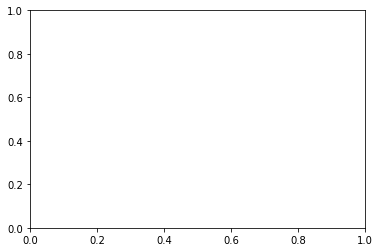

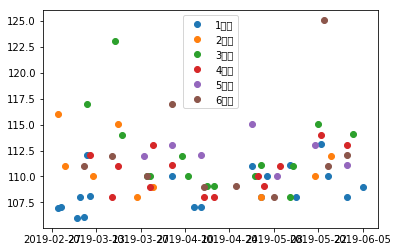

In [9]:
#### input ###
the_rno = "12R"
the_jcd = "住之江"
the_hd = "2019/06/10"

the_race_url = boatrace_crawler_conf.make_url("racelist", the_rno, the_jcd,the_hd)
print(the_race_url)

the_soup = boatrace_crawler_conf.html_parser(the_race_url)

racer_list = crawle_race_list(the_soup)
print(racer_list)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
for i, racer in enumerate(racer_list, 1):
    filtered_df = the_race_result_df[the_race_result_df["racerName_{0}".format(i)]==racer]
    ax1.plot_date(filtered_df["date"], filtered_df["raceTime_{0}".format(i)], label="{0}号艇".format(i))
    
plt.legend()
plt.show()